In [2]:
import pandas as pd
import os

#### Task#1: Merge the 12 months of sales data into a single CSV file

In [3]:
df = pd.read_csv("C:/Users/kumud/Downloads/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir("C:/Users/kumud/Downloads/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("C:/Users/kumud/Downloads/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False)


#### Read in updated dataframe

In [4]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Clean up the data!

##### Drop rows of NAN

In [5]:
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Find 'Or' and delete it

In [6]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

##### Convert columns to the correct type

In [10]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # Make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # Make float

### Augment data with additional columns

### Task 2: Add Month column

In [11]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype('int32')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task 3: Add a sales column

In [12]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task 4: Add a city column

In [13]:
# Let's use .apply()
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]
    
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Question 1: What was the best month for sales? How much was earned that month?

In [14]:
results = all_data.groupby('Month').sum()

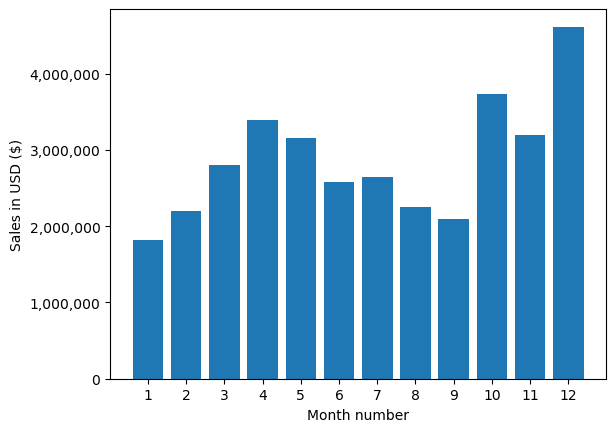

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

plt.bar(results.index,results["Sales"])
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(results.index)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()


#### Question 2: What city had the highest number of sales

In [16]:
results = all_data.groupby('City').sum()
results

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City,,,,,,,,
Atlanta (GA),1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,04-12-2019 10:5804/19/19 14:2904/27/19 12:2004...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",104794,2795498.58
Austin (TX),1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,04/21/19 07:2104-11-2019 16:5904/20/19 20:5304...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",69829,1819581.75
Boston (MA),1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22529,3637424.72,04-07-2019 22:3004-08-2019 14:0504-09-2019 23:...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",141116,3661656.96
Dallas (TX),1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,04/19/19 08:4604/16/19 19:2304/22/19 15:0904-0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",104620,2767975.40
Los Angeles (CA),1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,04-12-2019 14:3804-12-2019 14:3804/30/19 09:27...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",208325,5452570.80
New York City (NY),1765721765751765791765901765991766131766371766...,Apple Airpods HeadphonesAAA Batteries (4-pack)...,27932,4635370.83,04-04-2019 20:3004/27/19 00:3004-11-2019 10:23...,"149 Dogwood St, New York City, NY 10001433 Hil...",175741,4664317.43
Portland (ME),1767731768791769091770721772301772331772991773...,AAA Batteries (4-pack)Flatscreen TVWired Headp...,2750,447189.25,04/25/19 20:0704/13/19 14:1504/22/19 09:5304-0...,"30 9th St, Portland, ME 04101370 Sunset St, Po...",17144,449758.27
Portland (OR),1765831765931766171766421766461766481766621767...,AAA Batteries (4-pack)Lightning Charging Cable...,11303,1860558.22,04/20/19 12:0004/15/19 13:4504/25/19 08:0304/1...,"146 Jackson St, Portland, OR 97035906 7th St, ...",70621,1870732.34
San Francisco (CA),1765621765651765731765841765861765861765941765...,USB-C Charging CableMacbook Pro LaptopUSB-C Ch...,50239,8211461.74,04/29/19 13:0304/24/19 10:3804/27/19 18:4104/2...,"381 Wilson St, San Francisco, CA 94016915 Will...",315520,8262203.91


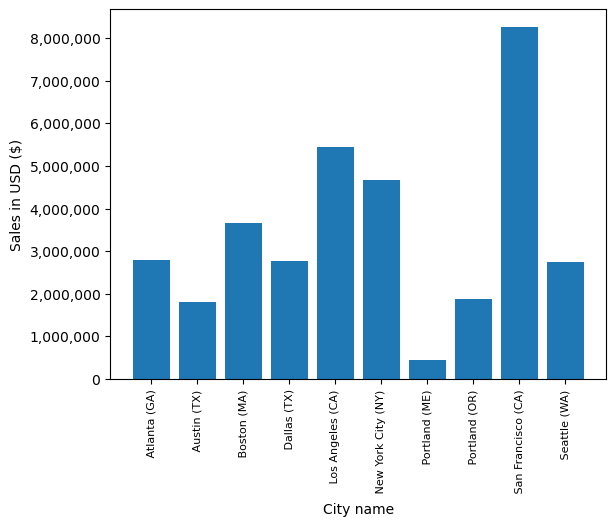

In [17]:
plt.bar(results.index,results["Sales"])
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')
plt.show()

#### Question 3: What time should we display advertisements to maximize liklihood of customer's buying product?

In [18]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

C:\Users\kumud\AppData\Local\Temp\ipykernel_18900\3842191188.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [19]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


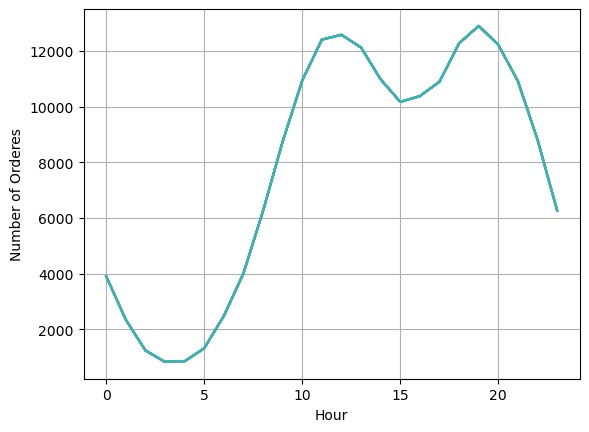

In [33]:
hours =  all_data.groupby('Hour').count()

plt.plot(hours.index, all_data.groupby(['Hour']).count())
plt.xlabel('Hour')
plt.ylabel('Number of Orderes')
plt.grid()
plt.show()

# My recommendation is around 11am (11) or 7pm (19)

#### Question 4: What products are most often sold together?

In [46]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()


C:\Users\kumud\AppData\Local\Temp\ipykernel_18900\4100886871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [56]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5:What product sold the most? Why do you think it sold the most?

In [57]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [64]:
all_data['Product'] = all_data['Product'].astype('string')

In [66]:
product_group = all_data.groupby('Product')

product_group.sum()

TypeError: datetime64 type does not support sum operations